In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import iqr
from statistics import mode 
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.ticker as mticker
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import scipy.spatial.distance as sdist
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
data = pd.read_excel('Week2_challenge_data_source.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [4]:
data.dropna(subset=['MSISDN/Number'], inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148935 entries, 0 to 149999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 148935 non-null  object        
 1   Start                                     148935 non-null  datetime64[ns]
 2   Start ms                                  148935 non-null  float64       
 3   End                                       148935 non-null  datetime64[ns]
 4   End ms                                    148935 non-null  float64       
 5   Dur. (ms)                                 148935 non-null  float64       
 6   IMSI                                      148935 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      148935 non-null  float64       
 9   Last Location N

In [6]:
experience_metrics = data.iloc[:,np.r_[7,10:16,30]]
experience_metrics

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
0,"33,664,962,239.00",42.00,5.00,23.00,44.00,nan,nan,Samsung Galaxy A5 Sm-A520F
1,"33,681,854,413.00",65.00,5.00,16.00,26.00,nan,nan,Samsung Galaxy J5 (Sm-J530)
2,"33,760,627,129.00",nan,nan,6.00,9.00,nan,nan,Samsung Galaxy A8 (2018)
3,"33,750,343,200.00",nan,nan,44.00,44.00,nan,nan,undefined
4,"33,699,795,932.00",nan,nan,6.00,9.00,nan,nan,Samsung Sm-G390F
...,...,...,...,...,...,...,...,...
149995,"33,668,648,496.00",313.00,9.00,"63,420.00","1,393.00","16,552,848.00","162,614.00",undefined
149996,"33,650,688,697.00",32.00,0.00,52.00,65.00,nan,nan,Apple iPhone 8 Plus (A1897)
149997,"33,663,449,963.00",27.00,2.00,23.00,54.00,nan,nan,Apple iPhone Se (A1723)
149998,"33,621,890,103.00",43.00,6.00,43.00,47.00,nan,nan,Apple iPhone Xs (A2097)


In [7]:
experience_metrics['Handset Type'].fillna(experience_metrics['Handset Type'].mode()[0], inplace=True)
experience_metrics['Avg RTT DL (ms)'].fillna(experience_metrics['Avg RTT DL (ms)'].median(), inplace=True)
experience_metrics['Avg RTT UL (ms)'].fillna(experience_metrics['Avg RTT UL (ms)'].median(), inplace=True)
experience_metrics['Avg Bearer TP DL (kbps)'].fillna(experience_metrics['Avg Bearer TP DL (kbps)'].median(), inplace=True)
experience_metrics['Avg Bearer TP UL (kbps)'].fillna(experience_metrics['Avg Bearer TP UL (kbps)'].median(), inplace=True)
experience_metrics['TCP DL Retrans. Vol (Bytes)'].fillna(experience_metrics['TCP DL Retrans. Vol (Bytes)'].median(), inplace=True)
experience_metrics['TCP UL Retrans. Vol (Bytes)'].fillna(experience_metrics['TCP UL Retrans. Vol (Bytes)'].median(), inplace=True)

experience_metrics["MSISDN/Number"]= experience_metrics["MSISDN/Number"].astype(str) 




C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [67]:
median = experience_metrics['Avg RTT DL (ms)'].quantile(0.50)
upper = experience_metrics['Avg RTT DL (ms)'].quantile(0.95)
experience_metrics['Avg RTT DL (ms)'] = np.where(experience_metrics['Avg RTT DL (ms)'] > upper, median, experience_metrics['Avg RTT DL (ms)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
median = experience_metrics['Avg RTT UL (ms)'].quantile(0.50)
upper = experience_metrics['Avg RTT UL (ms)'].quantile(0.95)
experience_metrics['Avg RTT UL (ms)'] = np.where(experience_metrics['Avg RTT UL (ms)'] > upper, median, experience_metrics['Avg RTT UL (ms)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
median = experience_metrics['Avg Bearer TP DL (kbps)'].quantile(0.50)
upper = experience_metrics['Avg Bearer TP DL (kbps)'].quantile(0.95)
experience_metrics['Avg Bearer TP DL (kbps)'] = np.where(experience_metrics['Avg Bearer TP DL (kbps)'] > upper, median, experience_metrics['Avg Bearer TP DL (kbps)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
median = experience_metrics['Avg Bearer TP UL (kbps)'].quantile(0.50)
upper = experience_metrics['Avg Bearer TP UL (kbps)'].quantile(0.95)
experience_metrics['Avg Bearer TP UL (kbps)'] = np.where(experience_metrics['Avg Bearer TP UL (kbps)'] > upper, median, experience_metrics['Avg Bearer TP UL (kbps)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
median = experience_metrics['TCP DL Retrans. Vol (Bytes)'].quantile(0.50)
upper = experience_metrics['TCP DL Retrans. Vol (Bytes)'].quantile(0.95)
experience_metrics['TCP DL Retrans. Vol (Bytes)'] = np.where(experience_metrics['TCP DL Retrans. Vol (Bytes)'] > upper, median, experience_metrics['TCP DL Retrans. Vol (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
median = experience_metrics['TCP UL Retrans. Vol (Bytes)'].quantile(0.50)
upper = experience_metrics['TCP UL Retrans. Vol (Bytes)'].quantile(0.95)
experience_metrics['TCP UL Retrans. Vol (Bytes)'] = np.where(experience_metrics['TCP UL Retrans. Vol (Bytes)'] > upper, median, experience_metrics['TCP UL Retrans. Vol (Bytes)'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
experience_metrics

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Average_TCP,Average_RTT,Average_TP
0,33664962239.0,42.00,5.00,23.00,44.00,"576,130.00","21,121.00",Samsung Galaxy A5 Sm-A520F,"586,690.50",47.00,67.00
1,33681854413.0,65.00,5.00,16.00,26.00,"576,130.00","21,121.00",Samsung Galaxy J5 (Sm-J530),"586,690.50",70.00,42.00
2,33760627129.0,45.00,5.00,6.00,9.00,"576,130.00","21,121.00",Samsung Galaxy A8 (2018),"586,690.50",50.00,15.00
3,33750343200.0,45.00,5.00,44.00,44.00,"576,130.00","21,121.00",undefined,"586,690.50",50.00,88.00
4,33699795932.0,45.00,5.00,6.00,9.00,"576,130.00","21,121.00",Samsung Sm-G390F,"586,690.50",50.00,15.00
...,...,...,...,...,...,...,...,...,...,...,...
149995,33668648496.0,45.00,9.00,63.00,"1,393.00","576,130.00","162,614.00",undefined,"16,634,155.00",322.00,"64,813.00"
149996,33650688697.0,32.00,0.00,52.00,65.00,"576,130.00","21,121.00",Apple iPhone 8 Plus (A1897),"586,690.50",32.00,117.00
149997,33663449963.0,27.00,2.00,23.00,54.00,"576,130.00","21,121.00",Apple iPhone Se (A1723),"586,690.50",29.00,77.00
149998,33621890103.0,43.00,6.00,43.00,47.00,"576,130.00","21,121.00",Apple iPhone Xs (A2097),"586,690.50",49.00,90.00


In [135]:
experience_metrics['Average_TCP'] = experience_metrics['TCP DL Retrans. Vol (Bytes)'] + experience_metrics['TCP UL Retrans. Vol (Bytes)']
experience_metrics['Average_RTT'] = experience_metrics['Avg RTT DL (ms)'] + experience_metrics['Avg RTT UL (ms)']
experience_metrics['Average_TP'] = experience_metrics['Avg Bearer TP DL (kbps)'] + experience_metrics['Avg Bearer TP UL (kbps)']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [136]:
experience_metrics

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Average_TCP,Average_RTT,Average_TP
0,33664962239.0,42.00,5.00,23.00,44.00,"576,130.00","21,121.00",Samsung Galaxy A5 Sm-A520F,"597,251.00",47.00,67.00
1,33681854413.0,65.00,5.00,16.00,26.00,"576,130.00","21,121.00",Samsung Galaxy J5 (Sm-J530),"597,251.00",70.00,42.00
2,33760627129.0,45.00,5.00,6.00,9.00,"576,130.00","21,121.00",Samsung Galaxy A8 (2018),"597,251.00",50.00,15.00
3,33750343200.0,45.00,5.00,44.00,44.00,"576,130.00","21,121.00",undefined,"597,251.00",50.00,88.00
4,33699795932.0,45.00,5.00,6.00,9.00,"576,130.00","21,121.00",Samsung Sm-G390F,"597,251.00",50.00,15.00
...,...,...,...,...,...,...,...,...,...,...,...
149995,33668648496.0,45.00,9.00,63.00,"1,393.00","576,130.00","162,614.00",undefined,"738,744.00",54.00,"1,456.00"
149996,33650688697.0,32.00,0.00,52.00,65.00,"576,130.00","21,121.00",Apple iPhone 8 Plus (A1897),"597,251.00",32.00,117.00
149997,33663449963.0,27.00,2.00,23.00,54.00,"576,130.00","21,121.00",Apple iPhone Se (A1723),"597,251.00",29.00,77.00
149998,33621890103.0,43.00,6.00,43.00,47.00,"576,130.00","21,121.00",Apple iPhone Xs (A2097),"597,251.00",49.00,90.00


In [137]:
experience_metrics

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Average_TCP,Average_RTT,Average_TP
0,33664962239.0,42.00,5.00,23.00,44.00,"576,130.00","21,121.00",Samsung Galaxy A5 Sm-A520F,"597,251.00",47.00,67.00
1,33681854413.0,65.00,5.00,16.00,26.00,"576,130.00","21,121.00",Samsung Galaxy J5 (Sm-J530),"597,251.00",70.00,42.00
2,33760627129.0,45.00,5.00,6.00,9.00,"576,130.00","21,121.00",Samsung Galaxy A8 (2018),"597,251.00",50.00,15.00
3,33750343200.0,45.00,5.00,44.00,44.00,"576,130.00","21,121.00",undefined,"597,251.00",50.00,88.00
4,33699795932.0,45.00,5.00,6.00,9.00,"576,130.00","21,121.00",Samsung Sm-G390F,"597,251.00",50.00,15.00
...,...,...,...,...,...,...,...,...,...,...,...
149995,33668648496.0,45.00,9.00,63.00,"1,393.00","576,130.00","162,614.00",undefined,"738,744.00",54.00,"1,456.00"
149996,33650688697.0,32.00,0.00,52.00,65.00,"576,130.00","21,121.00",Apple iPhone 8 Plus (A1897),"597,251.00",32.00,117.00
149997,33663449963.0,27.00,2.00,23.00,54.00,"576,130.00","21,121.00",Apple iPhone Se (A1723),"597,251.00",29.00,77.00
149998,33621890103.0,43.00,6.00,43.00,47.00,"576,130.00","21,121.00",Apple iPhone Xs (A2097),"597,251.00",49.00,90.00


In [138]:
experience_metrics_average_tcp= experience_metrics.groupby('MSISDN/Number').agg({'Average_TCP': 'sum'}).sort_values('Average_TCP',ascending=False)
experience_metrics_average_tcp.head(10)

,Average_TCP
MSISDN/Number,
33659822913.0,"55,650,789.00"
33604515716.0,"46,762,132.00"
33658316284.0,"46,349,770.00"
33667158309.0,"40,814,007.00"
33760037345.0,"39,421,670.00"
33675877202.0,"39,084,143.00"
33668870976.0,"38,192,805.00"
33760007704.0,"37,102,757.00"
33698792291.0,"36,950,080.00"


In [139]:
experience_metrics_average_tcp.tail(10)

,Average_TCP
MSISDN/Number,
33699694715.0,182.00
33679366089.0,179.00
33784203839.0,177.00
33769636458.0,176.00
33650681239.0,176.00
33607833304.0,143.00
33626357513.0,134.00
33762062356.0,129.00
33614777138.0,128.00


In [140]:
experience_metrics_average_tcp.mode()

,Average_TCP
0,"597,251.00"


In [141]:
experience_metrics_average_rtt= experience_metrics.groupby('MSISDN/Number').agg({'Average_RTT': 'sum'}).sort_values('Average_RTT',ascending=False)
experience_metrics_average_rtt.head(10)

,Average_RTT
MSISDN/Number,
33658263267.0,"1,519.00"
33763859490.0,"1,088.00"
33675877202.0,"1,062.00"
33662840755.0,"1,057.00"
33659841719.0,"1,018.00"
33659822913.0,"1,013.00"
33698805847.0,"1,008.00"
33660214653.0,992.00
33761847151.0,979.00


In [142]:
experience_metrics_average_rtt.tail(10)

,Average_RTT
MSISDN/Number,
33610846366.0,9.00
33672196893.0,9.00
33647679481.0,8.00
33668619895.0,6.00
33667477967.0,5.00
33659493541.0,5.00
33695045499.0,4.00
33660204450.0,2.00
33652982188.0,0.00


In [143]:
experience_metrics_average_rtt.mode()

,Average_RTT
0,50.00


In [144]:
experience_metrics_average_TP= experience_metrics.groupby('MSISDN/Number').agg({'Average_TP': 'sum'}).sort_values('Average_TP',ascending=False)
experience_metrics_average_TP.head(10)

,Average_TP
MSISDN/Number,
33662780927.0,"334,591.00"
33658263267.0,"322,564.00"
33650731215.0,"318,043.00"
33661295438.0,"312,316.00"
33664712899.0,"305,454.00"
33662745391.0,"290,419.00"
33762390172.0,"288,664.00"
33665321240.0,"287,372.00"
33661979039.0,"287,280.00"


In [145]:
experience_metrics_average_TP.tail(10)

,Average_TP
MSISDN/Number,
33662540046.0,0.00
33662321955.0,0.00
33662244588.0,0.00
33662203388.0,0.00
33661708210.0,0.00
33661089447.0,0.00
33660916790.0,0.00
33660874647.0,0.00
33660736208.0,0.00


In [146]:
experience_metrics_average_TP.mode()

,Average_TP
0,15.00


In [147]:
experience_metrics_handset_type= experience_metrics.groupby('MSISDN/Number').agg({'Handset Type': 'count'})
experience_metrics_handset_type.head(10)

,Handset Type
MSISDN/Number,
3197020876596.0,1
33601001722.0,1
33601001754.0,1
33601002511.0,1
33601007832.0,1
33601008617.0,2
33601010682.0,2
33601011634.0,2
33601011959.0,1


In [148]:
average_throughput_per_handset_type = experience_metrics.groupby('Handset Type', as_index=False).agg({'Average_TP': 'sum'}).sort_values('Average_TP',ascending=False)
average_throughput_per_handset_type

,Handset Type,Average_TP
316,Huawei B528S-23A,"554,164,919.00"
1393,undefined,"53,913,379.00"
337,Huawei E5180,"53,224,628.00"
49,Apple iPhone 6 (A1586),"52,549,577.00"
53,Apple iPhone 6S (A1688),"45,045,560.00"
...,...,...
172,Concox Informati. Concox Gt06 Gt06N Tr06,2.00
801,Quectel Wireless. Quectel Ec21-E,2.00
802,Quectel Wireless. Quectel Ec25-E,1.00
1251,Wct Uno,0.00


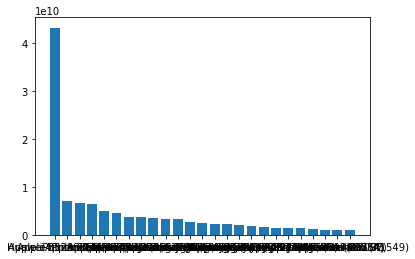

In [149]:
average_tcp_per_handset_type = experience_metrics.groupby('Handset Type', as_index=False).agg({'Average_TCP': 'sum'}).sort_values('Average_TCP',ascending=False)
data_25 = average_tcp_per_handset_type.head(25)
plt.bar(data_25['Handset Type'], data_25['Average_TCP'])
plt.show()

In [150]:
average_tcp_per_handset_type.head(10)

,Handset Type,Average_TCP
316,Huawei B528S-23A,"43,212,923,664.00"
49,Apple iPhone 6 (A1586),"6,974,756,922.00"
53,Apple iPhone 6S (A1688),"6,649,390,415.00"
1393,undefined,"6,376,315,832.00"
59,Apple iPhone 7 (A1778),"5,003,717,275.00"
337,Huawei E5180,"4,640,280,576.00"
78,Apple iPhone Xr (A2105),"3,727,365,167.00"
66,Apple iPhone 8 (A1905),"3,659,955,677.00"
73,Apple iPhone Se (A1723),"3,566,277,468.00"
75,Apple iPhone X (A1901),"3,262,357,385.00"


In [151]:
aggregated_metrics= experience_metrics.groupby('MSISDN/Number').agg({'Average_TCP': 'sum','Average_RTT': 'sum','Average_TP': 'sum','Handset Type':'count'}).sort_values(['Average_TCP','Average_RTT','Average_TP'], ascending=[False, False, False])
aggregated_metrics

,Average_TCP,Average_RTT,Average_TP,Handset Type
MSISDN/Number,,,,
33659822913.0,"55,650,789.00","1,013.00","274,421.00",10
33604515716.0,"46,762,132.00",809.00,"277,836.00",12
33658316284.0,"46,349,770.00",905.00,"123,917.00",6
33667158309.0,"40,814,007.00",296.00,"15,530.00",4
33760037345.0,"39,421,670.00",640.00,"168,193.00",6
...,...,...,...,...
33607833304.0,143.00,32.00,"16,853.00",1
33626357513.0,134.00,40.00,"10,964.00",1
33762062356.0,129.00,41.00,"32,577.00",1


In [152]:
aggregated_metrics

,Average_TCP,Average_RTT,Average_TP,Handset Type
MSISDN/Number,,,,
33659822913.0,"55,650,789.00","1,013.00","274,421.00",10
33604515716.0,"46,762,132.00",809.00,"277,836.00",12
33658316284.0,"46,349,770.00",905.00,"123,917.00",6
33667158309.0,"40,814,007.00",296.00,"15,530.00",4
33760037345.0,"39,421,670.00",640.00,"168,193.00",6
...,...,...,...,...
33607833304.0,143.00,32.00,"16,853.00",1
33626357513.0,134.00,40.00,"10,964.00",1
33762062356.0,129.00,41.00,"32,577.00",1


In [153]:
x = aggregated_metrics.values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(scaled_array)
X = df_normalized.values

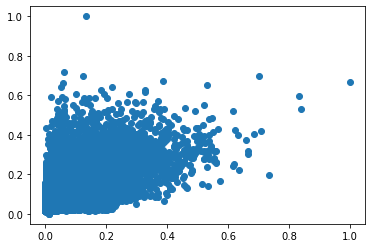

In [154]:
plt.scatter(X[:,0],X[:,1], label='True Position')
plt.show()

In [155]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [156]:
print(kmeans.labels_)

[2 2 2 ... 0 1 0]


In [157]:
print(kmeans.cluster_centers_)

[[0.04335795 0.08145208 0.12139315 0.04539955]
 [0.01403892 0.04093092 0.00802393 0.01188808]
 [0.17009243 0.26182939 0.36860946 0.18539762]]


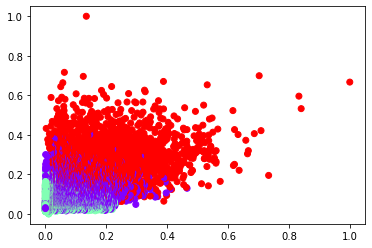

In [158]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

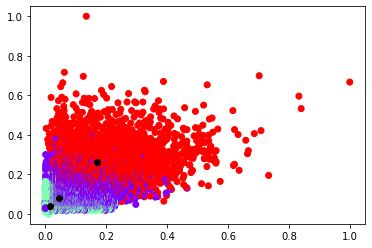

In [173]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.savefig('scatter_3.png', dpi=300)

In [160]:
aggregated_metrics['cluster'] = kmeans.labels_

In [161]:
customer_segments = aggregated_metrics.groupby('cluster', as_index=False).agg({'Average_TCP': ['min', 'max', 'mean','sum'], 
                                                              'Average_RTT': ['min', 'max', 'mean','sum'],
                                                              'Average_TP': ['min', 'max', 'mean','sum'],
                                                            'Handset Type': ['min', 'max', 'mean','sum']}).rename(columns={'Handset Type': 'Number of Phones'})         

In [162]:
customer_segments

cluster          Average_TCP                                            \
                           min                  max                 mean   
0       0                97.00        25,901,154.00         2,413,638.93   
1       1               128.00        12,848,241.00           781,478.31   
2       2            90,070.00        55,650,789.00         9,469,293.52   

                                Average_RTT                       \
                   sum                  min                  max   
0    52,670,428,740.00                19.00               611.00   
1    64,321,916,511.00                 0.00               326.00   
2    25,813,294,140.00                96.00             1,519.00   

                                                      Average_TP  \
                  mean                  sum                  min   
0               123.73         2,700,041.00                42.00   
1                62.18         5,118,247.00                 0.00   
2               397.83         1,084,484.00               630.00   

                                                                  \
                   max                 mean                  sum   
0           127,866.00            40,633.07       886,694,950.00   
1            32,123.00             2,686.69       221,136,441.00   
2           334,591.00           123,359.78       336,278,769.00   

  Number of Phones                                  
               min max                 mean    sum  
0                1   8                 1.77  38668  
1                1   4                 1.20  98947  
2                2  18                 4.15  11320

In [163]:
customer_segments_1 = aggregated_metrics.groupby('cluster', as_index=False).agg({'Average_TCP': ['min', 'max', 'mean'], 
                                                              'Average_RTT': ['min', 'max', 'mean'],
                                                              'Average_TP': ['min', 'max', 'mean'],
                                                            'Handset Type': ['min', 'max', 'mean']}).rename(columns={'Handset Type': 'Number of Phones'})         

In [164]:
customer_segments['Average_TCP']

,min,max,mean,sum
0,97.00,"25,901,154.00","2,413,638.93","52,670,428,740.00"
1,128.00,"12,848,241.00","781,478.31","64,321,916,511.00"
2,"90,070.00","55,650,789.00","9,469,293.52","25,813,294,140.00"


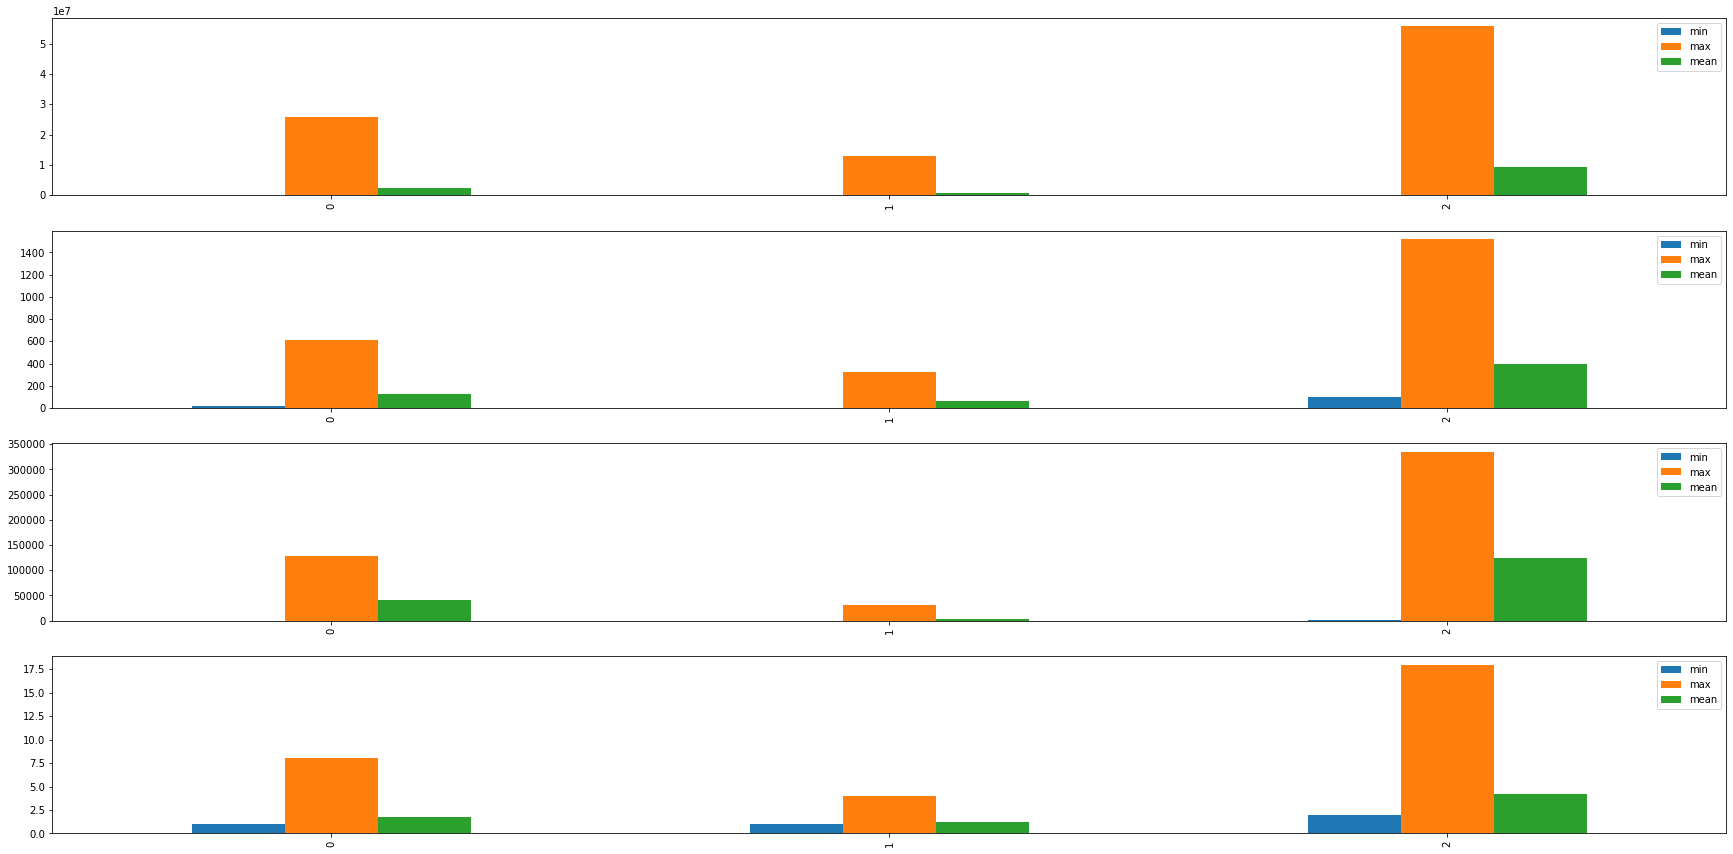

In [165]:

f, a = plt.subplots(4,1, figsize=(30,15))

customer_segments_1['Average_TCP'].plot(kind='bar',ax=a[0])
customer_segments_1['Average_RTT'].plot(kind='bar',ax=a[1])
customer_segments_1['Average_TP'].plot(kind='bar',ax=a[2])
customer_segments_1['Number of Phones'].plot(kind='bar',ax=a[3])

In [166]:
arr = np.mean(kmeans.cluster_centers_, axis = 1) 
arr

array([0.07290068, 0.01872046, 0.24648222])

In [167]:
X

array([[1.00000000e+00, 6.66886109e-01, 8.20168504e-01, 5.29411765e-01],
       [8.40277691e-01, 5.32587228e-01, 8.30374995e-01, 6.47058824e-01],
       [8.32867864e-01, 5.95786702e-01, 3.70353656e-01, 2.94117647e-01],
       ...,
       [5.75015312e-07, 2.69914417e-02, 9.73636470e-02, 0.00000000e+00],
       [5.57046083e-07, 4.21329822e-02, 2.58644136e-02, 0.00000000e+00],
       [0.00000000e+00, 3.15997367e-02, 9.13981548e-02, 0.00000000e+00]])

In [168]:
least = kmeans.cluster_centers_[0]

In [169]:
distances = []
for i in X:
    d = distance.euclidean(i, least)
    distances.append(d)

In [170]:
aggregated_metrics.index

Index(['33659822913.0', '33604515716.0', '33658316284.0', '33667158309.0',
       '33760037345.0', '33675877202.0', '33668870976.0', '33760007704.0',
       '33698792291.0', '33665182467.0',
       ...
       '33699694715.0', '33679366089.0', '33784203839.0', '33650681239.0',
       '33769636458.0', '33607833304.0', '33626357513.0', '33762062356.0',
       '33614777138.0', '33650128412.0'],
      dtype='object', name='MSISDN/Number', length=106856)

In [171]:
d = {'Customer_Number': aggregated_metrics.index, 'Experience_Score': distances}
experience_score = pd.DataFrame(d)
experience_score

,Customer_Number,Experience_Score
0,33659822913.0,1.41
1,33604515716.0,1.31
2,33658316284.0,1.01
3,33667158309.0,0.72
4,33760037345.0,0.87
...,...,...
106851,33607833304.0,0.11
106852,33626357513.0,0.12
106853,33762062356.0,0.09
106854,33614777138.0,0.12


In [172]:
experience_score.to_csv('experience.csv', index=False)